## Problem set 7

In [1]:
using Pkg
#Pkg.add(["Latexify", "Optim"])
using Distributions, Optim, Plots

### 1. Monte Carlo simulations for Probit Model

$$
Y_i = 1(X'_i\beta + U_i >= 0) \\
Y_i = 1(\beta_{10} + \beta_{20} x_i + U_i >= 0) \\
U_i|x_i ~ N(0,1) \\
x_i ~ N(0,1) \\
\beta_{10} = -0.5 \\
\beta_{20} = 1.0
$$
    

In [2]:
const n=1000;
const β₁=-.5;
const β₂=1.0;
const R=100; #number of MC replications

Φ(v)=cdf(Normal(0,1),v)
ϕ(v)=pdf(Normal(0,1),v)

cv=quantile(Normal(0,1),0.975)

1.9599639845400576

In [3]:
function gen_data(n,b₁,b₂)
    u=randn(n,1);
    x=randn(n,1);
    y=(β₁ .+ β₂*x +u .>0.0)*1.0;
    return x, y
end

gen_data (generic function with 1 method)

#### a. Generating observations

In [4]:
x,y=gen_data(n,β₁,β₂);
sum(y)

357.0

#### b. Probit Log-likelihood
$$
Define: \\
 \beta = (\beta_1, \beta_2)' \\
 X_i = (1, x_i)' \\
Q_n(\beta) = -\frac{1}{n}\sum_{n=1}^{\infty}Y_i log(\Phi(X'_i\beta) -\frac{1}{n}\sum_{n=1}^{\infty}(1-Y_i)log(1-\Phi(X'_i\beta))
$$

In [5]:
function LogL(b,x,y)
    n=length(y)
    L=0.0
    for i=1:n
        indx=b[1]+x[i]*b[2]
        L -=y[i]*log(Φ(indx))+(1-y[i])*log(1-Φ(indx))
    end
    return L/n
end

LogL (generic function with 1 method)

#### d. Logit likelihood

In [6]:
## Logit CDF
Λ(x)=exp(x)/(1+exp(x))

Λ (generic function with 1 method)

In [7]:
##Likelihood
function LogL_logit(b,x,y)
    n=length(y)
    L=0.0
    for i=1:n
        indx=b[1]+x[i]*b[2]
        L -=y[i]*log(Λ(indx))+(1-y[i])*log(1-Λ(indx))
    end
    return L/n
end

LogL_logit (generic function with 1 method)

#### e. Linear Probability Model 

In [8]:
function linprob(x,y)
    n=length(x)
    X=[ones(n,1) x]
    b=inv(X'*X)*X'*y
    return b
end
 

linprob (generic function with 1 method)

#### c, d. Estimation  n = 100

In [9]:
const n=100
const R=1000
β̂2_ML=zeros(R,1)
b2_LP=zeros(R,1)
b2_logit=zeros(R,1)


for j=1:R
    x,y=gen_data(n,β₁,β₂);
    #MLE
    result=optimize(b->LogL(b,x,y),[0.0;0.0;])
    β̂=Optim.minimizer(result)
    β̂2_ML[j,1]=β̂[2]
    
    #Logit
    result=optimize(b->LogL_logit(b,x,y),[0.0;0.0;])
    β̂=Optim.minimizer(result)
    b2_logit[j,1]=β̂[2]
    
    #LIN.Prob
    b=linprob(x,y)
    b2_LP[j,1]=b[2]
end

##### c., d. Bias and RMSE n =100

In [10]:
Bias_ML=mean(β̂2_ML .- β₂);
Bias_logit=mean(b2_logit .- β₂);
Bias_LP=mean(b2_LP .- β₂);


println("Simulated Bias")
println("ML      Logit       LP")
println(round(Bias_ML,digits=4),"   ", round(Bias_logit,digits=4),
    "   ",round(Bias_LP,digits=4))
println("----------------------")

RMSE_ML=sqrt(mean( (β̂2_ML .- β₂).^2) );
RMSE_logit=sqrt(mean( (b2_logit .- β₂).^2) );
RMSE_LP=sqrt(mean( (b2_LP .- β₂).^2) );

println("Simulated RMSE")
println("ML     Logit     LP")
println(round(RMSE_ML,digits=4),"    ", round(RMSE_logit,digits=4),
    "    ", round(RMSE_LP,digits=4))

Simulated Bias
ML      Logit       LP
0.0557   0.806   -0.7345
----------------------
Simulated RMSE
ML     Logit     LP
0.2401    0.9099    0.7352


##### f. g. h., Estimation, Bias and RMSE for  𝑛=1000

In [11]:
const n=1000

β̂2_ML=zeros(R,1)
b2_logit=zeros(R,1)
b2_LP=zeros(R,1)



for j=1:R
    x,y=gen_data(n,β₁,β₂);
    #MLE
    result=optimize(b->LogL(b,x,y),[0.0;0.0;])
    β̂=Optim.minimizer(result)
    β̂2_ML[j,1]=β̂[2]
    
    #Logit
    result=optimize(b->LogL_logit(b,x,y),[0.0;0.0;])
    β̂=Optim.minimizer(result)
    b2_logit[j,1]=β̂[2]
    
    #LIN.Prob
    b=linprob(x,y)
    b2_LP[j,1]=b[2]
end

Bias_ML=mean(β̂2_ML .- β₂);
Bias_logit=mean(b2_logit .- β₂);
Bias_LP=mean(b2_LP .- β₂);


println("Simulated Bias")
println("ML      Logit       LP")
println(round(Bias_ML,digits=4),"   ", round(Bias_logit,digits=4),
    "   ",round(Bias_LP,digits=4))
println("----------------------")

RMSE_ML=sqrt(mean( (β̂2_ML .- β₂).^2) );
RMSE_logit=sqrt(mean( (b2_logit .- β₂).^2) );
RMSE_LP=sqrt(mean( (b2_LP .- β₂).^2) );

println("Simulated RMSE")
println("ML     Logit     LP")
println(round(RMSE_ML,digits=4),"    ", round(RMSE_logit,digits=4),
    "    ", round(RMSE_LP,digits=4))

Simulated Bias
ML      Logit       LP
0.0028   0.7173   -0.7353
----------------------
Simulated RMSE
ML     Logit     LP
0.0633    0.7265    0.7353


### 3. Monte Carlo simulations for the efficient two-step GMM estimator
DGP :
$$ 
Y_i = \Lambda(X_i, \theta_0) + U_i \\
\Lambda(x, \theta) = \frac{2}{1 + exp(5-\theta x)} \\
X_i = exp(Z_{i,1} + Z_{1,2}) + V_i \\
U_i = \lambda V_i + \epsilon_i \\
$$
Given:
$$
Z_{i,1} ∼ N(2,1), Z_{i,2} ∼ N(−2,1), V_i ∼ N(0,1), ε_i ∼ N(0,1), \\
Z_{i,1},Z_{i,2},V_i,ε_i
\\
$$
are independent.

In [12]:
using Pkg
#Pkg.add(["Statistics", "ForwardDiff","Random"])
using LinearAlgebra, Plots, Statistics, Optim, ForwardDiff, Distributions, Random

#### Part (a): Data Generating Process (DGP)

In [13]:
Λ(x)=2/(1 + exp(5-x))


const θ₀=5.0;
const λ=0.9;

function DGP(n)
    
    Z₁=randn(n) .+ 2
    Z₂=randn(n) .- 2
    V=randn(n)
    ϵ=randn(n)
    
    X=exp.(Z₁+Z₂) +V
    U=λ*V+ϵ
    Y=Λ.(θ₀*X) +U
    
    return Y,X,Z₁,Z₂
end

DGP (generic function with 1 method)

#### Part (b): GMM criterion function

In [14]:
function Qₙ(θ,Y,X,Z₁,Z₂,WeightMatrix)
    n=length(Y)
    Z=[Z₁ Z₂]
    Error=Y-Λ.(θ.*X)
    M=Z' * Error/n
    return M'*WeightMatrix*M/2
end

Qₙ (generic function with 1 method)

#### Part (c): Plotting the criterion function for n = 100,000

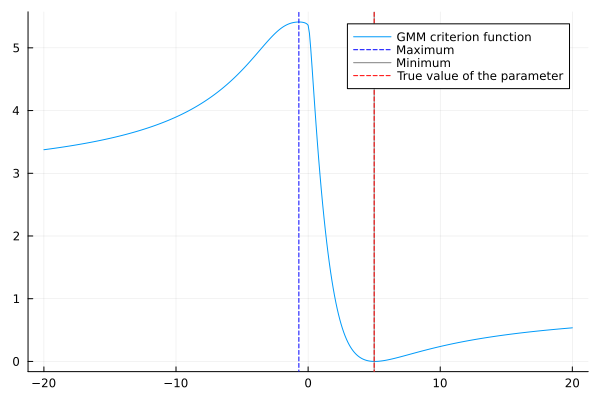

In [15]:
Random.seed!(627)

Y,X,Z₁,Z₂=DGP(10^5)
Q_plot(x)=Qₙ(x,Y,X,Z₁,Z₂,I)

grid=[-20:0.1:20;];
maximizer=grid[argmax(Q_plot.(grid))]
minimizer=grid[argmin(Q_plot.(grid))]

plot(grid,Q_plot.(grid),label="GMM criterion function")
vline!([maximizer],label="Maximum",style=:dash,color=:blue)
vline!([minimizer],label="Minimum",color=:gray)
vline!([θ₀],label="True value of the parameter", style=:dash,color=:red)

#### Part (d): Different starting values

In [16]:
starting_m5=Optim.minimizer(optimize(θ->Qₙ(θ,Y,X,Z₁,Z₂,I),[-5.0],NewtonTrustRegion(); autodiff = :forward))[1];
starting_0=Optim.minimizer(optimize(θ->Qₙ(θ,Y,X,Z₁,Z₂,I),[0.0],NewtonTrustRegion(); autodiff = :forward))[1];
starting_p20=Optim.minimizer(optimize(θ->Qₙ(θ,Y,X,Z₁,Z₂,I),[20.0],NewtonTrustRegion(); autodiff = :forward))[1];

In [17]:
println("Estimates for different starting values:")
println("-----------------------------------------")
println("Starting value    Estimate")
println("-5.0", "             ", round(starting_m5,digits=4))
println(" 0.0", "             ", round(starting_0,digits=4))
println("20.0", "             ", round(starting_p20,digits=4))

Estimates for different starting values:
-----------------------------------------
Starting value    Estimate
-5.0             -5.0
 0.0             5.0415
20.0             5.0415


##### Part (e): Hessian and asymptotic variance

#### Part (f): Function for two-step efficient GMM

In [18]:
function TSGMM(Y,X,Z₁,Z₂)
    
    #first step GMM
    Result=optimize(θ->Qₙ(θ,Y,X,Z₁,Z₂,I),[0.0],NewtonTrustRegion(); autodiff = :forward)
    θ̂₁=Optim.minimizer(Result)
    
    #Efficient Weight Matrix
    n=length(Y)
    g=[Z₁ .*(Y-Λ.(θ̂₁ .* X))  Z₂ .*(Y-Λ.(θ̂₁ .* X)) ] 
    Variance=g'*g/n
    WeightOptimal=inv(Variance)
    
    #Second step efficient GMM
    Result2=optimize(θ->Qₙ(θ,Y,X,Z₁,Z₂,WeightOptimal),θ̂₁,NewtonTrustRegion(); autodiff = :forward)
    θ̂₂=Optim.minimizer(Result2)
    
    #Standard Error
    AsyVar=ForwardDiff.hessian(θ->Qₙ(θ,Y,X,Z₁,Z₂,WeightOptimal),θ̂₂)
    stderr=sqrt(inv(AsyVar)/n)
    
    return θ̂₂[1], stderr[1]
end

TSGMM (generic function with 1 method)

##### Part (g): Simulated CI coverage

In [19]:
n=200
R=10000

Random.seed!(627)

Estimates=zeros(R)
StdErrors=zeros(R)

@time Threads.@threads for r=1:R
    Y,X,Z₁,Z₂=DGP(n)
    θ̂₂, stderr=TSGMM(Y,X,Z₁,Z₂)
    Estimates[r,1]=θ̂₂
    StdErrors[r,1]=stderr
end

 47.717420 seconds (64.17 M allocations: 6.834 GiB, 7.54% gc time, 80.47% compilation time)


In [20]:
# Critical values

z90=quantile(Normal(),0.95);
z95=quantile(Normal(),0.975);
z99=quantile(Normal(),0.995);

In [21]:
# CI coverage calculations

Coverage90=sum((Estimates - z90*StdErrors .<θ₀ .< Estimates + z90*StdErrors))/R
Coverage95=sum((Estimates - z95*StdErrors .<θ₀ .< Estimates + z95*StdErrors))/R
Coverage99=sum((Estimates - z99*StdErrors .<θ₀ .< Estimates + z99*StdErrors))/R

println("CI Coverage:")
println("-----------------------------------------")
println("Nominal    Simulated")
println("0.90", "        ", round(Coverage90,digits=4))
println("0.95", "        ", round(Coverage95,digits=4))
println("0.99", "        ", round(Coverage99,digits=4))

CI Coverage:
-----------------------------------------
Nominal    Simulated
0.90        0.9157
0.95        0.9481
0.99        0.9783
